# **Customer Churn Prediction for SyriaTel**
## **Introduction**

For SyriaTel, reducing customer churn is vital for maintaining a stable customer base and maximizing revenue. Accurate predictions of churn help the company take proactive measures to improve customer satisfaction and loyalty, thus improving long-term profitability and reducing operational costs associated with acquiring new customers.

## **Objective:**

The primary objective of this project is to predict customer churn for SyriaTel, a telecommunications company. Identifying customers likely to leave enables the company to implement retention strategies to prevent attrition and minimize revenue loss.

## **Data Understanding**

Data Source and Properties:
The dataset consists of 3,333 entries with 21 columns, covering various aspects of customer data, including demographics, service plans, usage metrics, and the target variable indicating churn.

## **Customer Demographics:**

state: State where the customer resides.
area code: Phone area code of the customer.
Service Plans:

international plan: Indicates whether the customer has an international plan.
voice mail plan: Indicates whether the customer has a voice mail plan.
Usage Metrics:

Includes metrics such as total day minutes, total eve minutes, total night minutes, and total intl minutes, along with charges for these categories and the number of calls.
Target Variable:

churn: Binary indicator (1 for churned, 0 for not churned).
Relevance to Problem:

This data is directly related to predicting customer churn, including both features that may influence churn (e.g., service usage, plan types) and the target variable indicating whether a customer has churned. Analyzing these features helps in identifying patterns that predict customer departure.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from graphviz import Source


ModuleNotFoundError: No module named 'graphviz'

#### Loading the dataset

In [ ]:
churn_data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Display a few rows of the dataset
(churn_data .head())

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# dataset shape
print(f"{'shape of the dataset'.title()} :- {churn_data.shape}")

Shape Of The Dataset :- (3333, 21)


In [ ]:
# missing values
print(f"\n {'Number of null values in every column'.title()} \n {churn_data.isnull().sum()}")


 Number Of Null Values In Every Column 
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [ ]:
# duplicate values
print(f"\n {'number of duplicate values'.title()} :- {len(churn_data.loc[churn_data.duplicated()])}")


 Number Of Duplicate Values :- 0


In [ ]:
# target value count
print(f"\n {'count of each value of target column'.title()} \n {churn_data.churn.value_counts()}")


 Count Of Each Value Of Target Column 
 churn
False    2850
True      483
Name: count, dtype: int64


In [ ]:
# information about dataset
print(f"{'dataset info'.title()} \n ")
churn_data.info()

Dataset Info 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       

In [ ]:
df = churn_data
df.shape

(3333, 21)

Voice Mail Plan and Number of Voicemail Messages:

Observation: The voice mail plan and number vmail messages columns appear to be closely related. Customers with a voice mail plan (voice mail plan = "yes") typically have a number vmail messages greater than 0.
Implication: Since the presence of a voice mail plan correlates with having voicemail messages, including both features might introduce redundancy. It could be beneficial to retain only one of these columns to avoid multicollinearity and simplify the model.
Day, Evening, Night, and International Charges and Minutes:

Observation: The columns total day charge, total eve charge, total night charge, and total intl charge are directly related to their respective total day minutes, total eve minutes, total night minutes, and total intl minutes. Each charge column is calculated by multiplying the corresponding minutes column by a per-minute rate.
Implication: Given this direct relationship, these pairs of columns are likely to be highly correlated. For modeling purposes, including both the minutes and charges might lead to multicollinearity. It might be more effective to use only one type of feature (e.g., minutes or charges) to prevent redundancy and improve model performance.
Phone Number, State, and Area Code:

Observation: Columns like phone number, state, and area code appear to function as identifiers rather than providing substantive quantitative or qualitative information relevant to predicting churn.
Phone number: Unique to each customer and does not contribute to predicting churn.
State: While it might offer geographical information, it could also be a categorical variable that may not directly impact churn prediction if not processed correctly.
Area code: Likely to be a categorical identifier that may not have a strong predictive power after encoding.
Implication: These columns may not provide useful information for churn prediction and could be considered for removal to streamline the dataset and focus on features with predictive value.

## Data Visualization

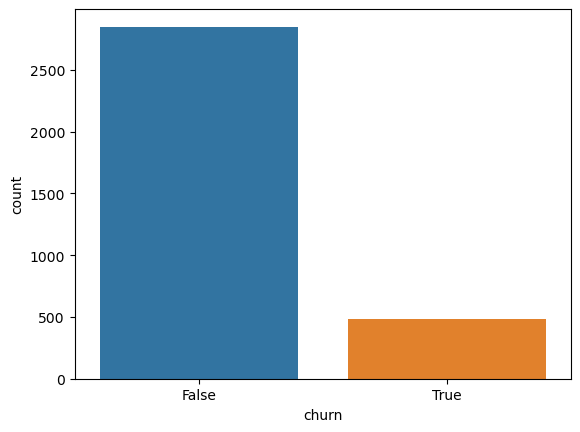

In [ ]:
sns.countplot(x ='churn', data = churn_data)
plt.show()

In [ ]:
# New categorical feature
df['vmail_messages'] = pd.cut(df['number vmail messages'],bins=[0,1,38,52],
                             labels=['No VM plan','Normal Users','High Frequency users'],
                             include_lowest=True)
df.head(20)
# if number of vmailmessage <1 = No VM plan
                # if numofvmailmessage >1 and <38 = Normal users
                # if numofvmailmessage >38 and <53= High Frequency users

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,vmail_messages
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,Normal Users
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,Normal Users
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,No VM plan
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,No VM plan
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,No VM plan
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,No VM plan
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False,Normal Users
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False,No VM plan
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,No VM plan
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False,Normal Users


### Total Day Minutes and Total Day Charge:

Observation: There is a perfect correlation (correlation of 1) between total day minutes and total day charge. This indicates that total day charge is directly derived from total day minutes using a fixed per-minute rate.
Recommendation: To avoid redundancy, you can retain only one of these features. Either total day minutes or total day charge can be used for modeling, as they provide the same information about day usage.

### Total Evening Minutes and Total Evening Charge:

Observation: Similarly, total eve minutes and total eve charge have a perfect correlation (correlation of 1). Total eve charge is calculated based on total eve minutes using a constant rate per minute.
Recommendation: Since these features are perfectly correlated, you can choose to keep either total eve minutes or total eve charge, as including both does not add additional predictive value.

### Total Night Minutes and Total Night Charge:

Observation: There is also a perfect correlation (correlation of 1) between total night minutes and total night charge. Total night charge is derived from total night minutes by applying a per-minute rate.
Recommendation: Given this perfect correlation, you should select one of these features for inclusion in your model. Both features are redundant, so choosing either total night minutes or total night charge will suffice.

### Total International Minutes and Total International Charge:

Observation: total intl minutes and total intl charge exhibit a perfect correlation (correlation of 1). This implies that total intl charge is directly calculated from total intl minutes with a fixed per-minute charge.
Recommendation: As these features are perfectly correlated, you can keep either total intl minutes or total intl charge. Including both features would introduce unnecessary redundancy.

### Building and evaluation of the model

### Feature Selection

ANOVA is used for comparing the distribution of a numeric variable in two or more groups¶
Ho = Null Hypothesis = the distribution of the varible in multiple groups is uniform
Ha = Alternate Hypothesis = the distribution of the variable in multiple groups in different

we analyse the pvalue, lets say for confidence interval of 95%, significance level = 5%

if pvalue>0.05 = accept the null hypothesis and the feature is NOT important if pvalue <0.05 = reject the null hypothesis and the feature is important

In [ ]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'vmail_messages'],
      dtype='object')

In [ ]:
numerics =['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']
xnum = df[numerics]
y = df['churn']
from sklearn.feature_selection import f_classif
fval,pval = f_classif(xnum,y)
for i in range(len(numerics)):print(numerics[i],pval[i])

account length 0.33976000705720666
number vmail messages 2.1175218402696038e-07
total day minutes 5.300278227509361e-33
total day calls 0.28670102402211844
total day charge 5.30060595239102e-33
total eve minutes 8.011338561256927e-08
total eve calls 0.5941305829720491
total eve charge 8.036524227754477e-08
total night minutes 0.04046648463758881
total night calls 0.7230277872081609
total night charge 0.040451218769160205
total intl minutes 8.05731126549437e-05
total intl calls 0.002274701409850077
total intl charge 8.018753583047257e-05
customer service calls 3.900360240185746e-34


In [ ]:
#using chi square test
categories = ['state','area code','phone number', 'international plan',
       'voice mail plan','vmail_messages']

y = df['churn']
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
for col in categories:
    xcat = LabelEncoder().fit_transform(df[col]).reshape(-1,1)
    cval,pval = chi2(xcat,y)
    print(col,pval)

state [0.19214979]
area code [0.89394206]
phone number [1.91173945e-14]
international plan [4.09173473e-46]
voice mail plan [5.28486023e-07]
vmail_messages [0.0396314]


In [ ]:
#selection of important features based on the objectives of this project
x = df[['international plan','vmail_messages','total day minutes','total eve minutes',
     'total night minutes','total intl minutes','customer service calls']]
y = df['churn']

## Preprocesing

In [ ]:
def col_unique_values(col_name):
  ## input : category variables

  print(f"****************** Col Name : {col_name} ****************")
  print(f"Unique Values :- \n {churn_data[col_name].unique()}")
  print(f"Number of Unique values :- {churn_data[col_name].nunique()}\n\n")
total_col_names = churn_data.columns


In [ ]:
#columns
total_col_names = churn_data.columns

In [ ]:
# find numeric columns (int & float, bool)

num_cols = churn_data._get_numeric_data().columns

# getting category columns

cat_col_names = list(set(total_col_names) - set(num_cols))

for col_name in cat_col_names:
  ## check unique values of every category column
  col_unique_values(col_name)


****************** Col Name : international plan ****************
Unique Values :- 
 ['no' 'yes']
Number of Unique values :- 2


****************** Col Name : vmail_messages ****************
Unique Values :- 
 ['Normal Users', 'No VM plan', 'High Frequency users']
Categories (3, object): ['No VM plan' < 'Normal Users' < 'High Frequency users']
Number of Unique values :- 3


****************** Col Name : state ****************
Unique Values :- 
 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Number of Unique values :- 51


****************** Col Name : voice mail plan ****************
Unique Values :- 
 ['yes' 'no']
Number of Unique values :- 2




In [ ]:
# Apply label encoding operation on category columns
def label_encoding(col_name):
  le = LabelEncoder()
  churn_data[col_name] = le.fit_transform(churn_data[col_name])
for col_name in cat_col_names:
  label_encoding(col_name)


In [ ]:
# sample dataset after label encoding
churn_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,vmail_messages
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,Normal Users
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,Normal Users
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,No VM plan
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,No VM plan
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,No VM plan


In [ ]:
def model_building(model_name):
  model = model_name
  model.fit(X_train, y_train)
  y_prediction = model.predict(X_test)
  print(classification_report(y_test, y_prediction))

In [ ]:
# separating dependent and independent variables
X = churn_data.drop(['churn'], axis=1)
y = churn_data['churn']

column_names = list(X.columns)

## create pipeline to apply feature scaling
pipeline = Pipeline([
                     ('std_scaler', StandardScaler())
])


In [ ]:
print(X_transformed.shape)


(3333, 70)


In [ ]:
print(len(all_feature_names))
print(all_feature_names)


70
['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'international plan_no', 'international plan_yes', 'voice mail pla

In [ ]:
x.head()

,international plan,vmail_messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls
0,no,Normal Users,265.1,197.4,244.7,10.0,1
1,no,Normal Users,161.6,195.5,254.4,13.7,1
2,no,No VM plan,243.4,121.2,162.6,12.2,0
3,yes,No VM plan,299.4,61.9,196.9,6.6,2
4,yes,No VM plan,166.7,148.3,186.9,10.1,3


### Hotencoding categorical features

In [ ]:
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(),[1]),
                                ('ode',OrdinalEncoder(),[0]),
                                 ('sc',StandardScaler(),[2,3,4,5,6])],remainder='passthrough')

In [ ]:
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new).head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,1.566767,-0.070610,0.866743,-0.085008,-0.427932
1,0.0,0.0,1.0,0.0,-0.333738,-0.108080,1.058571,1.240482,-0.427932
2,0.0,1.0,0.0,0.0,1.168304,-1.573383,-0.756869,0.703121,-1.188218
3,0.0,1.0,0.0,1.0,2.196596,-2.742865,-0.078551,-1.303026,0.332354
4,0.0,1.0,0.0,1.0,-0.240090,-1.038932,-0.276311,-0.049184,1.092641


In [ ]:
# train test split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(3333, 7)
(2666, 9)
(667, 9)
(3333,)
(2666,)
(667,)


## Logistic regression

In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(xtrain,ytrain)

LogisticRegression(class_weight='balanced')

In [ ]:
#Performance Analysis
from sklearn import metrics
ypred = model.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred))
print("Recall : ",metrics.recall_score(ytest,ypred))
print("F1 score : ",metrics.f1_score(ytest,ypred))
print("Precision : ",metrics.precision_score(ytest,ypred))

Accuracy :  0.775112443778111
Recall :  0.7934782608695652
F1 score :  0.4932432432432432
Precision :  0.35784313725490197


In [ ]:
# performance analysis on train data
ypred2 = model.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  0.764066016504126
Recall :  0.7570332480818415
F1 score :  0.4848484848484849
Precision :  0.3566265060240964


## Classifiers
### Decision Tree

In [ ]:
# preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(),[1]),
                                ('ode',OrdinalEncoder(),[0])],
                                remainder="passthrough")
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,265.1,197.4,244.7,10.0,1.0
1,0.0,0.0,1.0,0.0,161.6,195.5,254.4,13.7,1.0
2,0.0,1.0,0.0,0.0,243.4,121.2,162.6,12.2,0.0
3,0.0,1.0,0.0,1.0,299.4,61.9,196.9,6.6,2.0
4,0.0,1.0,0.0,1.0,166.7,148.3,186.9,10.1,3.0
...,...,...,...,...,...,...,...,...,...
3328,0.0,0.0,1.0,0.0,156.2,215.5,279.1,9.9,2.0
3329,0.0,1.0,0.0,0.0,231.1,153.4,191.3,9.6,3.0
3330,0.0,1.0,0.0,0.0,180.8,288.8,191.9,14.1,2.0
3331,0.0,1.0,0.0,1.0,213.8,159.6,139.2,5.0,2.0


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(3333, 7)
(2666, 9)
(667, 9)
(3333,)
(2666,)
(667,)


In [ ]:
# decision tree
model2 = DecisionTreeClassifier(random_state=5,class_weight={0:0.5,1:0.5})
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=5)

## Visualizing the decision Tree Model

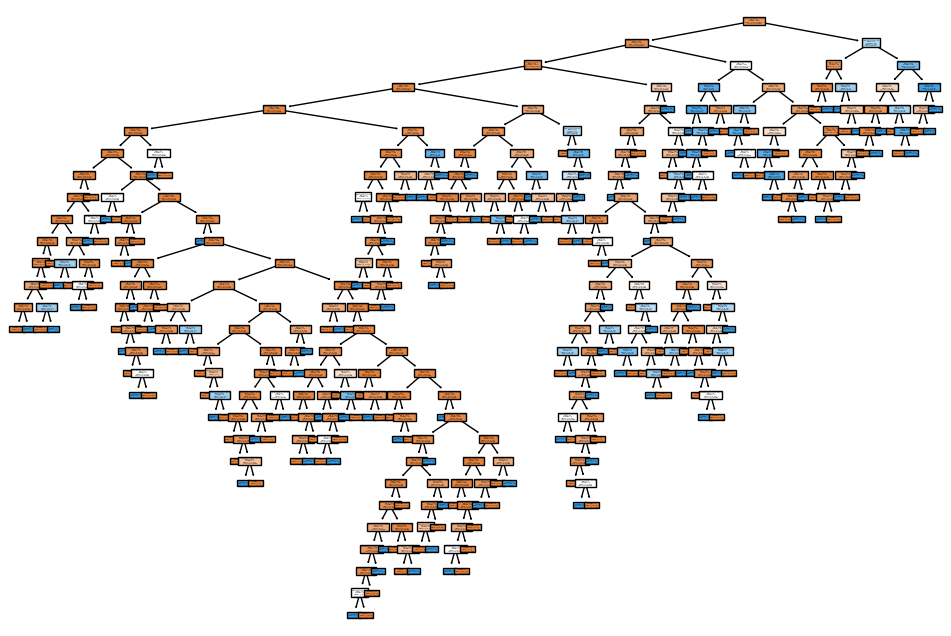

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model2, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [ ]:
# performance analysis
ypred2 = model2.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred2))
print("Recall : ",metrics.recall_score(ytest,ypred2))
print("F1 score : ",metrics.f1_score(ytest,ypred2))
print("Precision : ",metrics.precision_score(ytest,ypred2))

Accuracy :  0.8995502248875562
Recall :  0.7391304347826086
F1 score :  0.6699507389162561
Precision :  0.6126126126126126


## Reccommendations

1. Enhance Customer Experience

Improve Customer Service: Since high numbers of customer service calls are a feature in your dataset, consider investing in training and resources to improve the quality of customer service. Ensure that customer service representatives are well-equipped to resolve issues efficiently and effectively.

Personalize Interactions: Use customer data to personalize interactions and offers. Personalized experiences can improve customer satisfaction and reduce churn. For example, tailor communication and promotions based on customer usage patterns and preferences.

2. Targeted Retention Campaigns

Identify At-Risk Customers: Use the churn prediction model to identify customers who are at high risk of churning. Develop targeted retention campaigns specifically designed for these customers.

Special Offers and Discounts: Offer incentives such as discounts on service plans, special promotions, or loyalty rewards to at-risk customers. These incentives can encourage them to stay with SyriaTel.

Enhanced Service Plans: For customers who frequently use customer service or have high usage, offer service plan upgrades or additional features that enhance their experience.

3. Improve Service Quality and Offerings

Analyze Usage Patterns: Examine the usage patterns of customers who churn and compare them with those who stay. This analysis can help identify gaps in service quality or features that are missing or underperforming.

Upgrade Service Plans: Regularly review and upgrade service plans based on customer feedback and usage trends. Introduce new features or improve existing ones to keep customers engaged.

Reduce Service Disruptions: Ensure that there are minimal service disruptions and high-quality network coverage. Frequent disruptions can lead to customer dissatisfaction and churn.

4. Proactive Engagement

Regular Check-ins: Implement regular check-ins with customers to understand their needs and address any potential issues before they escalate. This could be through surveys, feedback forms, or direct communication.

Feedback Mechanisms: Establish robust mechanisms for collecting and acting on customer feedback. Use this feedback to make improvements and show customers that their opinions are valued.

5. Optimize Pricing Strategies

Competitive Pricing: Regularly review and adjust pricing strategies to remain competitive in the market. Ensure that pricing is aligned with the value provided and that customers perceive it as fair.

Flexible Plans: Offer flexible plans that cater to different customer segments and usage patterns. This can help retain customers who may be looking for more tailored or affordable options.

6. Leverage Data and Analytics

Customer Segmentation: Segment customers based on their likelihood to churn, usage patterns, and service plans. This segmentation can help tailor retention strategies and improve their effectiveness.

Predictive Analytics: Continuously refine and update the churn prediction model to ensure its accuracy. Use predictive analytics to anticipate customer behavior and make data-driven decisions.

Monitor KPIs: Track key performance indicators (KPIs) related to customer retention, satisfaction, and churn. Use these metrics to gauge the effectiveness of retention strategies and make necessary adjustments.

7. Customer Loyalty Programs

Loyalty Rewards: Implement loyalty programs that reward long-term customers with benefits such as exclusive offers, discounts, or early access to new features.

Referral Programs: Encourage existing customers to refer friends and family by offering referral bonuses or discounts. This can help acquire new customers while rewarding current ones.

# Conclusion

By leveraging predictive modeling and data analysis, SyriaTel can gain valuable insights into customer behavior and churn patterns. Implementing the recommended strategies will help reduce churn, improve customer satisfaction, and ultimately enhance the company’s profitability and stability in the competitive telecommunications market.